# ANALYSING THE CUSTOMER BEHAVIOUR 

In [13]:
# Import packages
from sklearn import datasets  #wasn't necessary as the dataset has been imported from the hard drive
from sklearn.naive_bayes import GaussianNB   # importing Gaussian naive bayes from sklearn.naive_bayes library        
from sklearn.model_selection import train_test_split # to split the data into training and testing 
from sklearn.metrics import confusion_matrix # to calculate accuracy, precision and recall of the model
import numpy as np # for any numerical calculations 
import pandas as pd # to open and read the dataset
import matplotlib.pyplot as plt #for visual representation of attributes 
import seaborn as sns; sns.set() #for plotting the heatmap

In [2]:
customer = pd.read_csv(r"C:\Users\Acharya\Downloads\datasets\customer_behaviour.csv")
print("Dataset dimensions",customer.shape,"\n")
print("Attributes include\n",customer.columns,"\n")
customer.info()

# Print the first 7 row
customer.head(20)

Dataset dimensions (400, 5) 

Attributes include
 Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
#check for missing values 
customer.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
customer.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
cat_cols = ["Gender"]
customer = pd.get_dummies(customer,columns=cat_cols,drop_first=True,)
print("Modified dimensions after dummification",customer.shape)

Modified dimensions after dummification (400, 5)


In [6]:
X = customer.copy().drop("Purchased",axis=1)
y = customer["Purchased"]
print("Input attributes X:", X.shape)
print("Input attributes X:", X.columns)
print("Output attribute y:", y.shape) 

Input attributes X: (400, 4)
Input attributes X: Index(['User ID', 'Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')
Output attribute y: (400,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Input attributes X - Train dataset:", X_train.shape)
print("Input attributes X - Test dataset:", X_test.shape)
print("Output attribute y - Train dataset:", y_train.shape)
print("Output attribute y - Test dataset:", y_test.shape)

Input attributes X - Train dataset: (320, 4)
Input attributes X - Test dataset: (80, 4)
Output attribute y - Train dataset: (320,)
Output attribute y - Test dataset: (80,)


# USING A NAIVE BAYES MODEL FOR CLASSIFICATION (other classification models can be used)

[[49  7]
 [ 2 22]]


Text(80.90000000000006, 0.5, 'Predicted')

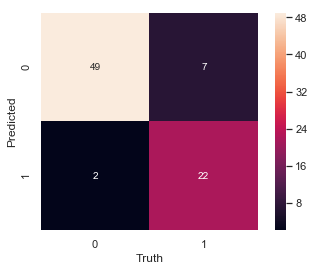

In [8]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(X_train, y_train)

# Predict Output 
pred = model.predict(X_test)

# Plot Confusion Matrix
mat = confusion_matrix(pred, y_test)
print(mat)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y_test, pred)

0.8875

In [ ]:
# accuracy score of 88% indicates that model predicted the correct output 88% of the times  

In [11]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

# Explaining the precision and recall here

In [4]:
TP,FP,TN,FN = [22,2,49,7]

In [9]:
Precision=TP/(TP+FP)

In [10]:
Precision

0.9166666666666666

PRECISION indicates that among all the customers who claimed to purchase the item by the model, 91% of them actually purchased 

In [11]:
Recall =TP/(TP+FN)

In [12]:
Recall

0.7586206896551724

Recall indicates that among all the customers who actually purchased the item, 75% of them were identified correctly by us